In [2]:
#A3为例


In [3]:
import MySQLdb
import psycopg2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [4]:
# 特征
# 用户下单金额
# 用户注册时间
# 开服10天参与锻造次数
# 开服10-20天参与锻造次数
# 开服20-之后参与锻造次数
# 最后一次消费距离合服时间
# 全部消费金额
# 用户登录天数


In [5]:
PG_HOST = XXXXX
PG_PORT = XXXXX
PG_USER = XXXXX
PG_PASSWORD = XXXXX
PG_DATABASE = XXXXX

In [6]:
serverid='glb00008'
startdate = '2020-09-07 00:00:00.0'
enddate= '2020-11-05 00:00:00.0'

In [7]:

conn= MySQLdb.connect(
        host=XXXXX
        port = XXXXX
        user=XXXXX
        passwd=XXXXX
        db =XXXXX
        )



#通过获取到的数据库连接conn下的cursor()方法来创建游标。
cur = conn.cursor()
#创建数据表,通过游标cur 操作execute()方法可以写入纯sql语句。通过execute()方法中写如sql语句来对数据进行操作 
sql_= f""" select fee,player_id,wash_date,ch from db_ana_t11.point_log_detail where server ='{serverid}' and wash_date between '{startdate}' and '{enddate}' order by player_id asc  """


print(sql_)
cur.execute(sql_)
rows_ = cur.fetchall()
#print(rows_)
#zc_table.append(rows_)
rows_ = pd.DataFrame(rows_)
#cur.close()  
cur.close()

#conn.commit()方法在提交事物，在向数据库插入一条数据时必须要有这个方法，否则数据不会被真正的插入。
conn.commit()

#conn.close()关闭数据库连接
conn.close()



 select fee,player_id,wash_date,ch from db_ana_t11.point_log_detail where server ='glb00008' and wash_date between '2020-09-07 00:00:00.0' and '2020-11-05 00:00:00.0' order by player_id asc  


In [8]:
rows_

,0,1,2,3
0,99,7912876956820439040,2020-09-07,agl
1,99,7912876956821159936,2020-09-07,agl
2,99,7912876956821684224,2020-09-07,agl
3,99,7912876956823224320,2020-09-07,agl
4,99,7912876956824993792,2020-09-07,agl
...,...,...,...,...
9233,99,7912877098452123648,2020-10-27,agl
9234,99,7912877101872054272,2020-10-29,agl
9235,499,7912877107152420864,2020-11-02,agl
9236,99,7912877114604486656,2020-11-03,agl


In [9]:
df = rows_

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9238 entries, 0 to 9237
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       9238 non-null   int64         
 1   1       9238 non-null   int64         
 2   2       9238 non-null   datetime64[ns]
 3   3       9238 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 288.8+ KB


In [11]:
df.columns = ['fee', 'player_id', 'wash_date','ch']

In [12]:
df

,fee,player_id,wash_date,ch
0,99,7912876956820439040,2020-09-07,agl
1,99,7912876956821159936,2020-09-07,agl
2,99,7912876956821684224,2020-09-07,agl
3,99,7912876956823224320,2020-09-07,agl
4,99,7912876956824993792,2020-09-07,agl
...,...,...,...,...
9233,99,7912877098452123648,2020-10-27,agl
9234,99,7912877101872054272,2020-10-29,agl
9235,499,7912877107152420864,2020-11-02,agl
9236,99,7912877114604486656,2020-11-03,agl


In [13]:
len(list(set(df['player_id'].tolist())))

1947

In [14]:
9238/1947

4.744735490498202

In [15]:
df.describe()

,fee,player_id
count,9238.000000,9.238000e+03
mean,353.741286,7.912877e+18
std,810.372252,1.684930e+10
min,99.000000,7.912877e+18
25%,99.000000,7.912877e+18
50%,99.000000,7.912877e+18
75%,299.000000,7.912877e+18
max,9999.000000,7.912877e+18


In [16]:

conn= MySQLdb.connect(
        host='glb-washerdata.mysql.database.azure.com',
        port = 3306,
        user='gmdb@glb-washerdata',
        passwd='PLrGisMS0HRaFE7f',
        db ='db_ana_t11',
        )



#通过获取到的数据库连接conn下的cursor()方法来创建游标。
cur = conn.cursor()
#创建数据表,通过游标cur 操作execute()方法可以写入纯sql语句。通过execute()方法中写如sql语句来对数据进行操作 
sql_1= f"""select fee,player_id,wash_date,ch,count(fee) from db_ana_t11.point_log_detail where server ='{serverid}' and wash_date between '{startdate}' and '{enddate}' group by player_id,wash_date,ch order by player_id,wash_date asc """


print(sql_1)
cur.execute(sql_1)
rows_1 = cur.fetchall()
#print(rows_)
#zc_table.append(rows_)
rows_1 = pd.DataFrame(rows_1)
#cur.close()  
cur.close()

#conn.commit()方法在提交事物，在向数据库插入一条数据时必须要有这个方法，否则数据不会被真正的插入。
conn.commit()

#conn.close()关闭数据库连接
conn.close()



select fee,player_id,wash_date,ch,count(fee) from db_ana_t11.point_log_detail where server ='glb00008' and wash_date between '2020-09-07 00:00:00.0' and '2020-11-05 00:00:00.0' group by player_id,wash_date,ch order by player_id,wash_date asc 


In [17]:
df2 = rows_1
df2.columns = ['fee', 'player_id', 'wash_date','ch','count']

In [18]:
df2.describe()

,fee,player_id,count
count,5440.000000,5.440000e+03,5440.000000
mean,320.783088,7.912877e+18,1.698162
std,666.155628,1.817187e+10,1.346168
min,99.000000,7.912877e+18,1.000000
25%,99.000000,7.912877e+18,1.000000
50%,99.000000,7.912877e+18,1.000000
75%,299.000000,7.912877e+18,2.000000
max,9999.000000,7.912877e+18,17.000000


In [19]:
# 一共有9238条记录，充值人数为1947，平均每人充值4.7次左右，均值为353，表名存在用户购买次数分布呈现正态右偏分布的泊松分布
# 从count得知，仅有少部分的每日订单次数是大于2的，可能存在订单数的2-8原则，呈现尾态分布

In [20]:
df['wash_date'] = pd.to_datetime(df['wash_date'],format='%Y%m%d')

In [21]:
df['day'] = df['wash_date'].values.astype('datetime64[M]')

In [22]:
df.head()

,fee,player_id,wash_date,ch,month
0,99,7912876956820439040,2020-09-07,agl,2020-09-01
1,99,7912876956821159936,2020-09-07,agl,2020-09-01
2,99,7912876956821684224,2020-09-07,agl,2020-09-01
3,99,7912876956823224320,2020-09-07,agl,2020-09-01
4,99,7912876956824993792,2020-09-07,agl,2020-09-01


In [23]:
df2

,fee,player_id,wash_date,ch,count
0,99,7912876956820439040,2020-09-07,agl,1
1,99,7912876956821159936,2020-09-07,agl,1
2,99,7912876956821684224,2020-09-07,agl,1
3,99,7912876956823224320,2020-09-07,agl,1
4,99,7912876956824993792,2020-09-07,agl,1
...,...,...,...,...,...
5435,99,7912877098452123648,2020-10-27,agl,2
5436,99,7912877101872054272,2020-10-29,agl,1
5437,499,7912877107152420864,2020-11-02,agl,1
5438,99,7912877114604486656,2020-11-03,agl,1


In [24]:
df3= df
df=df2
df2=df3

In [25]:
df

,fee,player_id,wash_date,ch,count
0,99,7912876956820439040,2020-09-07,agl,1
1,99,7912876956821159936,2020-09-07,agl,1
2,99,7912876956821684224,2020-09-07,agl,1
3,99,7912876956823224320,2020-09-07,agl,1
4,99,7912876956824993792,2020-09-07,agl,1
...,...,...,...,...,...
5435,99,7912877098452123648,2020-10-27,agl,2
5436,99,7912877101872054272,2020-10-29,agl,1
5437,499,7912877107152420864,2020-11-02,agl,1
5438,99,7912877114604486656,2020-11-03,agl,1


In [26]:
df['player_id'] = LabelEncoder().fit_transform(df['player_id'])

In [27]:
df

,fee,player_id,wash_date,ch,count
0,99,0,2020-09-07,agl,1
1,99,1,2020-09-07,agl,1
2,99,2,2020-09-07,agl,1
3,99,3,2020-09-07,agl,1
4,99,4,2020-09-07,agl,1
...,...,...,...,...,...
5435,99,1942,2020-10-27,agl,2
5436,99,1943,2020-10-29,agl,1
5437,499,1944,2020-11-02,agl,1
5438,99,1945,2020-11-03,agl,1


In [28]:
df['wash_date'] = pd.to_datetime(df['wash_date'],format='%Y%m%d')
df['day'] = df['wash_date'].values.astype('datetime64[D]')

In [29]:
df

,fee,player_id,wash_date,ch,count,day
0,99,0,2020-09-07,agl,1,2020-09-07
1,99,1,2020-09-07,agl,1,2020-09-07
2,99,2,2020-09-07,agl,1,2020-09-07
3,99,3,2020-09-07,agl,1,2020-09-07
4,99,4,2020-09-07,agl,1,2020-09-07
...,...,...,...,...,...,...
5435,99,1942,2020-10-27,agl,2,2020-10-27
5436,99,1943,2020-10-29,agl,1,2020-10-29
5437,499,1944,2020-11-02,agl,1,2020-11-02
5438,99,1945,2020-11-03,agl,1,2020-11-03


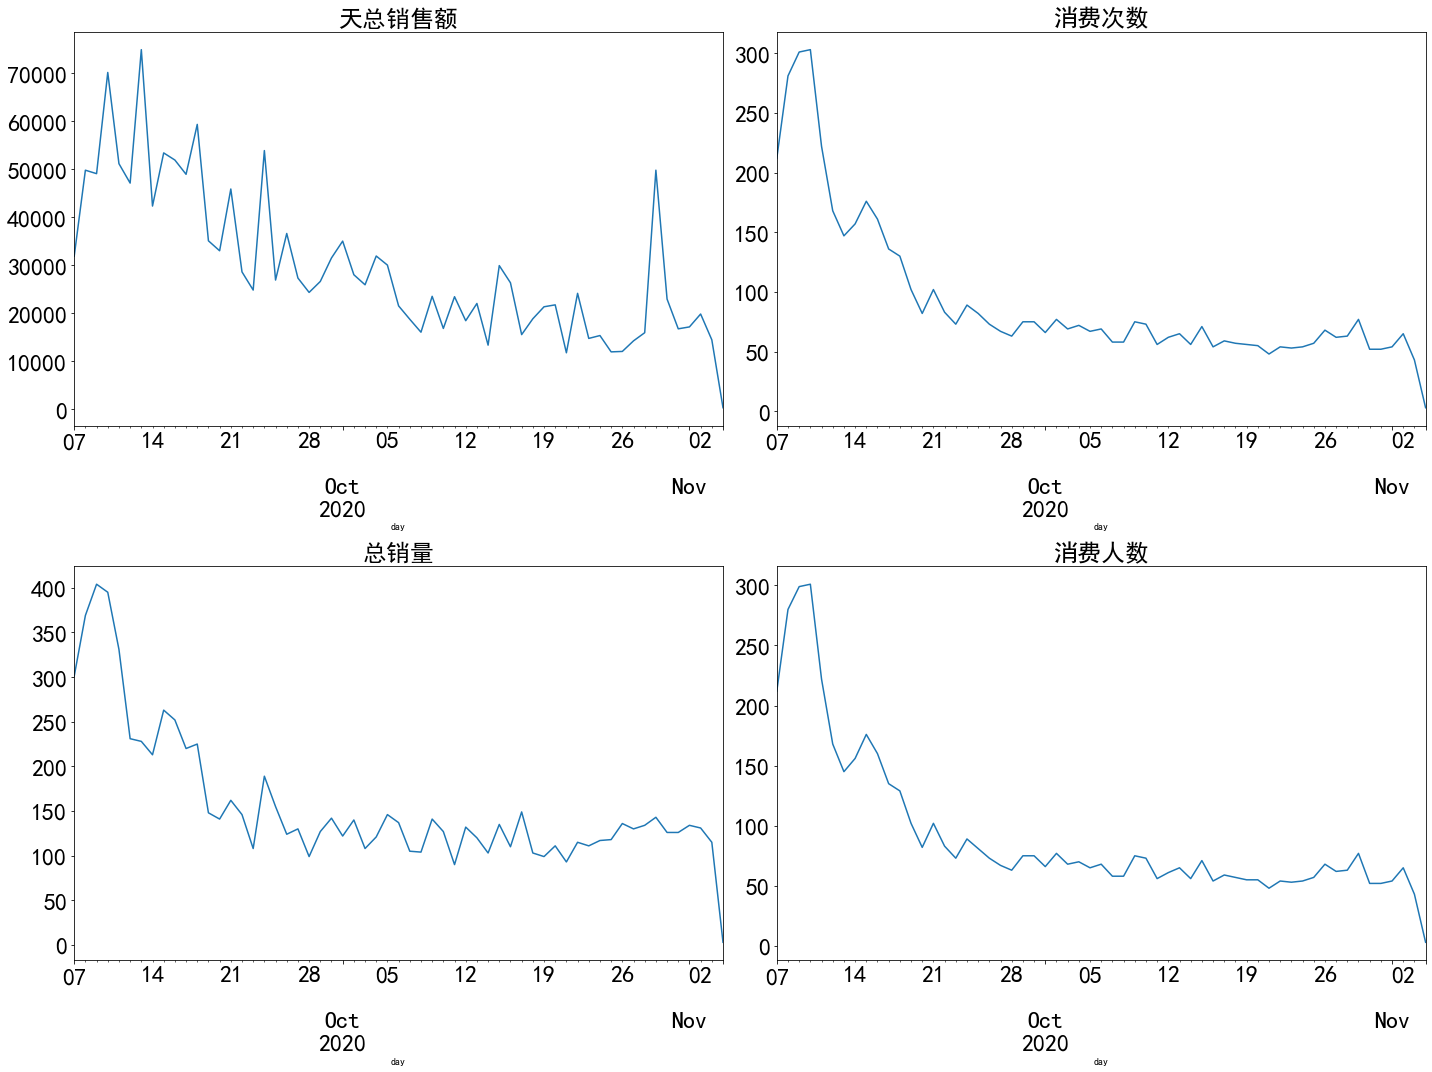

In [30]:
import warnings
warnings.filterwarnings('ignore')

#解决中文显示参数设置
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.figure(figsize=(20,15))

# 天总销售额
plt.subplot(221)
df.groupby('day')['fee'].sum().plot(fontsize=24) 
plt.title('天总销售额',fontsize=24) 
 
# 天消费次数
plt.subplot(222)
df.groupby('day')['wash_date'].count().plot(fontsize=24)
plt.title('消费次数',fontsize=24) 

#每天的销量
plt.subplot(223)
df.groupby('day')['count'].sum().plot(fontsize=24)
plt.title('总销量',fontsize=24)

#每天的消费人数
plt.subplot(224)
df.groupby('day')['player_id'].apply(lambda x:len(x.unique())).plot(fontsize=24)
plt.title('消费人数',fontsize=24)
plt.tight_layout() # 设置子图的间距
plt.show()

In [31]:
#个体用户消费分析

In [32]:
df.pivot_table(values='count',index='player_id')

,count
player_id,
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1942,2.0
1943,1.0
1944,1.0


In [33]:
# 根据用户id进行分组
group_user = df.groupby('player_id').sum()
group_user.describe()

,fee,count
count,1947.000000,1947.000000
mean,896.281459,4.744735
std,3513.748670,14.001250
min,99.000000,1.000000
25%,99.000000,1.000000
50%,99.000000,1.000000
75%,497.000000,3.000000
max,86455.000000,224.000000


In [34]:
# 从用户的角度看，平均每位用户购买4.7次，最大购买份数为224次
# 用户平均消费金额在896元左右，标准差为3513
# 结合分位数和最大值看，平均值大于75%分位，肯定存在高额消费用户，这也符合二八法则，也可以说是一九。

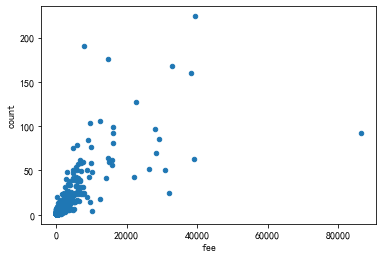

In [35]:
# 用户消费金额和消费次数的散点图
# 查询条件：订单金额 < 4000
group_user.query('fee<100000').plot.scatter(x='fee',y='count')

In [36]:
# 从散点图可以看出，用户并存在异常值情况，且规律性也比较强。
# 可能是因为商品并不单一，金额和商品数量的关系也因此呈现非线性，有几个离群点。

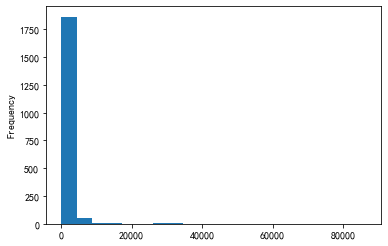

In [37]:
# 用户消费金额的分布图
group_user.fee.plot.hist(bins=20)

In [40]:
# 从图中可以看出，用户的消费趋势较为集中，但存在若干极大值的干扰。这里进行截断操作再进行查看

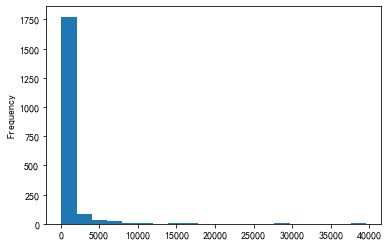

In [41]:
group_user.query('fee < 50000')['fee'].plot.hist(bins=20)

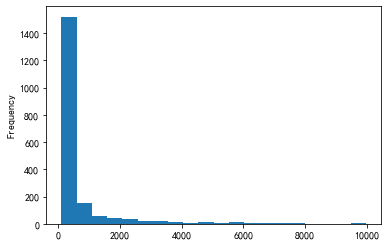

In [42]:
group_user.query('fee < 10000')['fee'].plot.hist(bins=20)


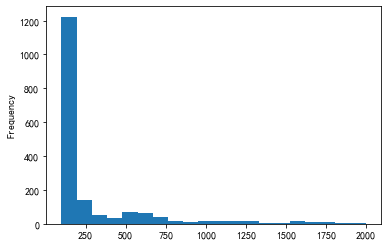

In [43]:
group_user.query('fee < 2000')['fee'].plot.hist(bins=20)


In [44]:
#大部分用户的消费能力并不高，将近半数的用户消费金额不超过200元，高消费用户(>200元)不超过2人

In [45]:
# 从上图直方图可知，大部分用户的消费能力确实不高，绝大部分呈现较低的消费能力。高消费用户在图中几乎看不到，但这确实符合消费行业

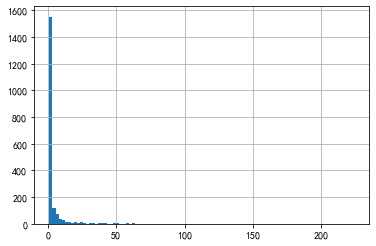

In [46]:
# 用户消费次数的分布图
group_user['count'].hist(bins=100)

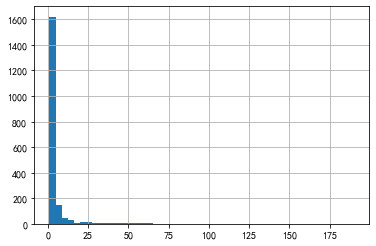

In [47]:
group_user.query('count < 200')['count'].hist(bins=50)

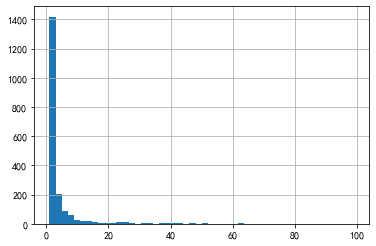

In [48]:
group_user.query('count < 100')['count'].hist(bins=50)

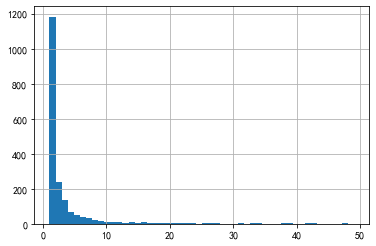

In [49]:
group_user.query('count < 50')['count'].hist(bins=50)

In [50]:
# 大部分用户购买数量都是在3次以内，购买多次的用户数量并不多

In [51]:
# 用户消费周期分析

In [52]:
orderdt_min=df.groupby('player_id')['wash_date'].min()#第一次消费
orderdt_max=df.groupby('player_id')['wash_date'].max()#最后一次消费
(orderdt_max-orderdt_min) 

player_id
0      0 days
1      0 days
2      0 days
3      0 days
4      0 days
        ...  
1942   0 days
1943   0 days
1944   0 days
1945   0 days
1946   0 days
Name: wash_date, Length: 1947, dtype: timedelta64[ns]

In [53]:
(orderdt_max-orderdt_min).mean()

Timedelta('7 days 02:11:38.921417565')

In [54]:
# 所有用户的平均生命周期是7天

In [55]:
# 用户生命周期分布

# 一般用户的生命周期分为以下部分：

# 阶段A:客户获取。发现和获取潜在客户，并通过有效渠道提供合适的价值定位以获取客户。

# 阶段B:客户提升。通过刺激需求的产品组合或服务组合把客户培养成高价值客户。

# 阶段C:客户成熟。使客户使用电信新产品，培养客户的忠诚度。

# 阶段D:客户衰退。建立高危客户预警机制，延长客户的生命周期。

# 阶段E:客户离网。该阶段主要是赢回客户。

# 从而这里的用户生命周期长度就是从阶段A到阶段E的长度。从下图中可知，用户的生命周期长度大多是在50天左右。而若是为了延长用户生命周期或者是防止客户流失，就应该需要对用户生命周期长度细分到每一个阶段，这样在时间上更精确的管理不同阶段的客户

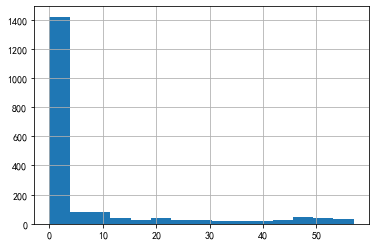

In [56]:
((orderdt_max-orderdt_min)/np.timedelta64(1,'D')).hist(bins=15)

In [57]:
# 这里是将消费了一次以上的客户就纳入生命周期统计。但也可以统计老客户的生命周期，老客户的定义就是消费两次以上的客户。而老客户的生命周期是如何定义呢？将用户第一次购买时间与第二次购买时间相减的天数大于0作为老客户的生命周期，若天数等于0表示仅购买过一次的新客户。

In [58]:
# 计算所有消费过两次以上的老客户的生命周期
life_time = (orderdt_max - orderdt_min).reset_index()
life_time.head()

,player_id,wash_date
0,0,0 days
1,1,0 days
2,2,0 days
3,3,0 days
4,4,0 days


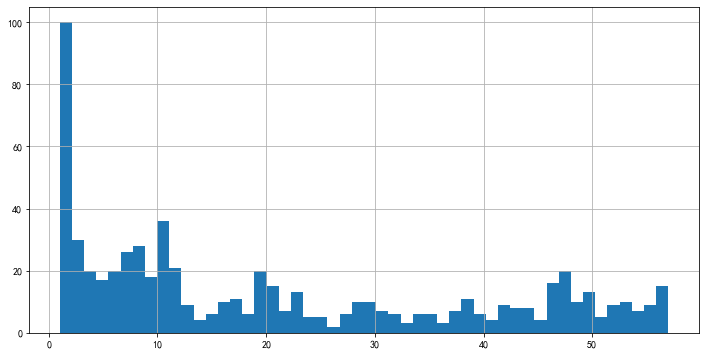

In [59]:
# 用户声明周期分布图
plt.figure(figsize=(10,5))
life_time['life_time'] = life_time['wash_date'] / np.timedelta64(1,'D')
life_time[life_time.life_time>0]['life_time'].hist(bins=50,figsize=(12,6))

In [60]:
# 上图可见，用户生命周期呈现单峰趋势，10天内生命周期的用户是一个高峰，45至50天内生命周期的用户是另一个高峰。

# 根据此情况，应该在10天内对客户进行引导，促进其再次消费并形成消费习惯，延长其生命周期；在10至45天的用户，也要根据其特点推出有针对性的营销活动，引导其持续消费。

# 分析去掉0天生命周期的用户之后的用户生命周期的平均值。

In [61]:
# 用户分层
# 按用户价值分层 -- RFM模型

# 为了进行精细化运营，可以利用RFM模型对用户价值指数(衡量历史到当前用户贡献的收益)进行计算，其中

# 最近一次消费-R：客户最近一次交易时间的间隔。R值越大，表示客户交易发生的日期越久，反之则交易发生的日期越近。

# 消费频率-F：客户在最近一段时间内交易的次数。F值越大，表示客户交易频繁，反之表示客户交易不活跃。

# 消费金额-M：客户在最近一段时间内交易的金额。M值越大，表示客户价值越高，反之则表示客户价值越低。

In [62]:
rfm = df.pivot_table(index='player_id',
                     values=['fee','wash_date','count'],
                    aggfunc={'fee':'sum',
                            'wash_date':'max',
                            'count':'sum'})
rfm

,count,fee,wash_date
player_id,,,
0,1,99,2020-09-07
1,1,99,2020-09-07
2,1,99,2020-09-07
3,1,99,2020-09-07
4,1,99,2020-09-07
...,...,...,...
1942,2,99,2020-10-27
1943,1,99,2020-10-29
1944,1,499,2020-11-02


In [63]:
# 日期的最大值与当前日期的差值为R
rfm['R'] = (rfm['wash_date'].max() - rfm['wash_date']) / np.timedelta64(1,'D')
rfm.rename(columns = {'fee':'M',
                     'count':'F'},
          inplace=True)

# 构建rfm模型公式
def get_rfm(x):
    level = x.apply(lambda x:'1' if x>=0 else '0')
    label = level['R'] + level['F'] + level['M']
    d = {'111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'}
    
    result = d[label]
    return result
rfm['label'] = rfm[['R','F','M']].apply(lambda x:(x-x.mean()) / x.std()).apply(get_rfm,axis=1)
rfm.head()
#求和
rfm.groupby('label').sum()

,F,M,R
label,,,
一般价值客户,178,11328,1419.0
一般保持客户,348,28976,1131.0
一般发展客户,583,75473,8983.0
一般挽留客户,1592,183171,66427.0
重要价值客户,267,83643,1587.0
重要保持客户,6113,1283008,2572.0
重要发展客户,104,52009,803.0
重要挽留客户,53,27452,908.0


In [ ]:
# 以上为不同层次用户的消费人数，重要保持客户的消费人数排名第一，有216人，一般挽留客户排名第二，有1240人，与重要保持客户差距比较大，业务方可以根据结果对客户分类运营，降低营销成本，提高ROI。



In [71]:
len(rfm[rfm['label']=='重要保持客户'])

216

In [72]:
len(rfm[rfm['label']=='一般挽留客户'])

1240

In [76]:
# 将用户消费数据进行数据透视：
# 用户活跃程度分层
# 将用户消费数据进行数据透视：
df1 = df.pivot_table(index = "player_id",
                     columns = "day",
                     values = 'wash_date',
                     aggfunc = 'count').fillna(0)

In [77]:
df1

day,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,...,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04
player_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# 图中的数字（0，1，2）代表了当天的消费次数。

In [78]:
df2 = df1.applymap(lambda x:1 if x>0 else 0)
df2.tail()

day,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,...,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04
player_id,,,,,,,,,,,,,,,,,,,,,
1942,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# 0代表当天没有消费，1代表有消费。

In [81]:
# （new=新、active=活跃、return=回流、unactive=流失,unreg=未注册）
# (new=1,active=2,return=3,unactive=4,unreg=0)
def active_status(data):
    status=[]
    for i in range(59): #共18个天
        
        #若本天没有消费
        if data[i]==0:
            if len(status)>0:#前面某天消费过，是老客
                if status[i-1]==0:#前一个天不是首次消费，不是新客
                    status.append(0)#则本天也不是新客
                else:
                    status.append(4)#前一个天是首次消费，属于新客，则本天为不活跃用户
            else:
                status.append(0)#前面某天没有消费过，则本天也不是新客
         #若本天消费
        else:
            if len(status)==0:#前面没有消费过
                status.append(1)#则为新客
            else:#前面消费过
                if status[i-1] ==4:#前一个天没有消费，是不活跃用户
                    status.append(3)#本天为回流用户
                elif status[i-1]==0:#前一个天没有消费，不是新客
                    status.append(1)
                else:#前一个天是首次消费
                    status.append(2)#本天为活跃用户
    return status

#可得到一张不同用户在不同天份的不同状态（new=新、active=活跃、return=回流、
# unactive=流失）,unreg相当于未注册，指这个用户在这个天及以前从未购买过产品，
# 主要为了统计起来更加方便而加进去。
indexs = df['day'].sort_values().astype('str').unique()
df3 = df2.apply(lambda x:pd.Series(active_status(x),index=indexs),axis=1)
df3.head()

,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,...,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04
player_id,,,,,,,,,,,,,,,,,,,,,
0,1,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1,1,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,1,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,1,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,1,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [82]:
#把unreg替换成NaN，再用fillna(0)把空值填为0。然后转置，把天份作为索引行，
# 状态作为列，得到如下的表
df4=df3.replace(0,np.NaN).apply(lambda x:pd.value_counts(x)).fillna(0).T
df4.columns = df4.columns.astype(int).map(lambda x:str(x))
df4

,1,2,3,4
2020-09-07,212.0,0.0,0.0,0.0
2020-09-08,242.0,38.0,0.0,174.0
2020-09-09,247.0,45.0,7.0,402.0
2020-09-10,233.0,47.0,21.0,633.0
2020-09-11,144.0,44.0,34.0,856.0
2020-09-12,77.0,47.0,44.0,987.0
2020-09-13,72.0,40.0,33.0,1082.0
2020-09-14,74.0,36.0,46.0,1145.0
2020-09-15,92.0,33.0,51.0,1217.0
2020-09-16,77.0,34.0,49.0,1310.0


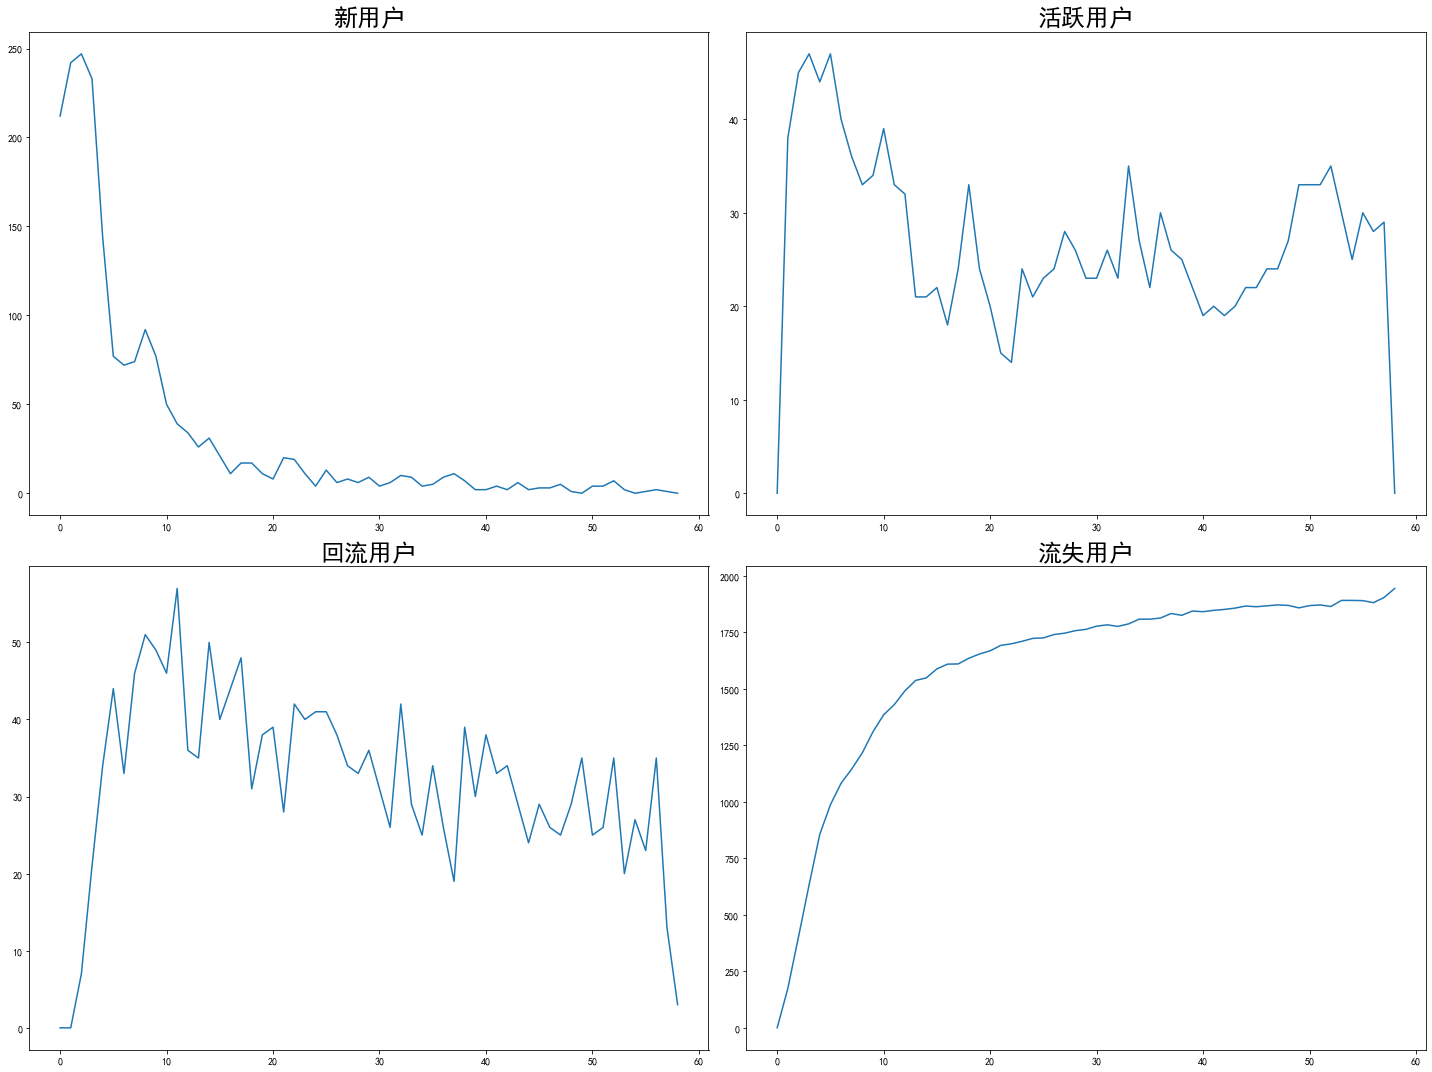

In [171]:

plt.figure(figsize=(20,15))

# 新
plt.subplot(221)
y1=df4['1']
x1=range(len(y1))
plt.plot(x1,y1)
plt.title('新用户',fontsize=24) 
 
# 活跃
plt.subplot(222)
y2=df4['2']
x2=range(len(y2))
plt.plot(x2,y2)
plt.title('活跃用户',fontsize=24) 

#回流
plt.subplot(223)
y3=df4['3']
x3=range(len(y3))
plt.plot(x3,y3)
plt.title('回流用户',fontsize=24)

#流失
plt.subplot(224)
y4=df4['4']
x4=range(len(y4))
plt.plot(x4,y4)
plt.title('流失用户',fontsize=24)
plt.tight_layout() # 设置子图的间距
plt.show()

In [ ]:
#从表中可以看出，新客都是集中在前5个天，回流用户整体在200左右，而不活跃用户数量随着时间稍有上升。

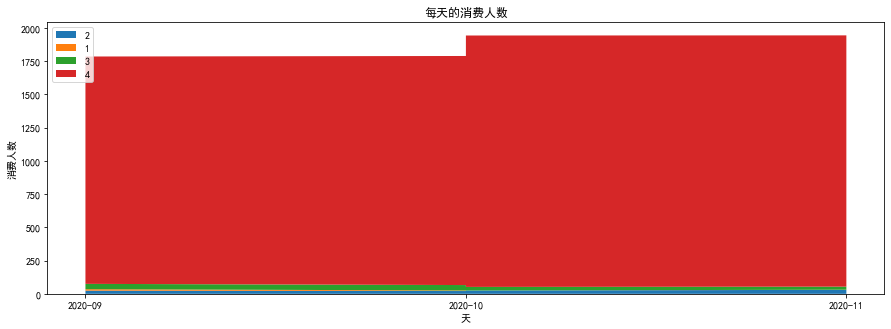

In [83]:
# 作出非堆积效果图
u = df4.reset_index()
labels = u[['2','1','3','4']].columns
plt.figure(figsize=(15,5))
plt.stackplot(u['index'].astype(str).apply(lambda x:x[:-3]), 
              u['2'],u['1'],u['3'],u['4'], 
              labels=labels)
plt.xlabel('天')
plt.ylabel('消费人数')
plt.title('每天的消费人数')
plt.legend(loc='upper left')

In [84]:
df5=df4.apply(lambda x:x/x.sum(),axis=1)#每一层用户占总用户的比例
df5

,1,2,3,4
2020-09-07,1.000000,0.000000,0.000000,0.000000
2020-09-08,0.533040,0.083700,0.000000,0.383260
2020-09-09,0.352354,0.064194,0.009986,0.573466
2020-09-10,0.249465,0.050321,0.022484,0.677730
2020-09-11,0.133581,0.040816,0.031540,0.794063
2020-09-12,0.066667,0.040693,0.038095,0.854545
2020-09-13,0.058680,0.032600,0.026895,0.881826
2020-09-14,0.056879,0.027671,0.035357,0.880092
2020-09-15,0.066045,0.023690,0.036612,0.873654
2020-09-16,0.052381,0.023129,0.033333,0.891156


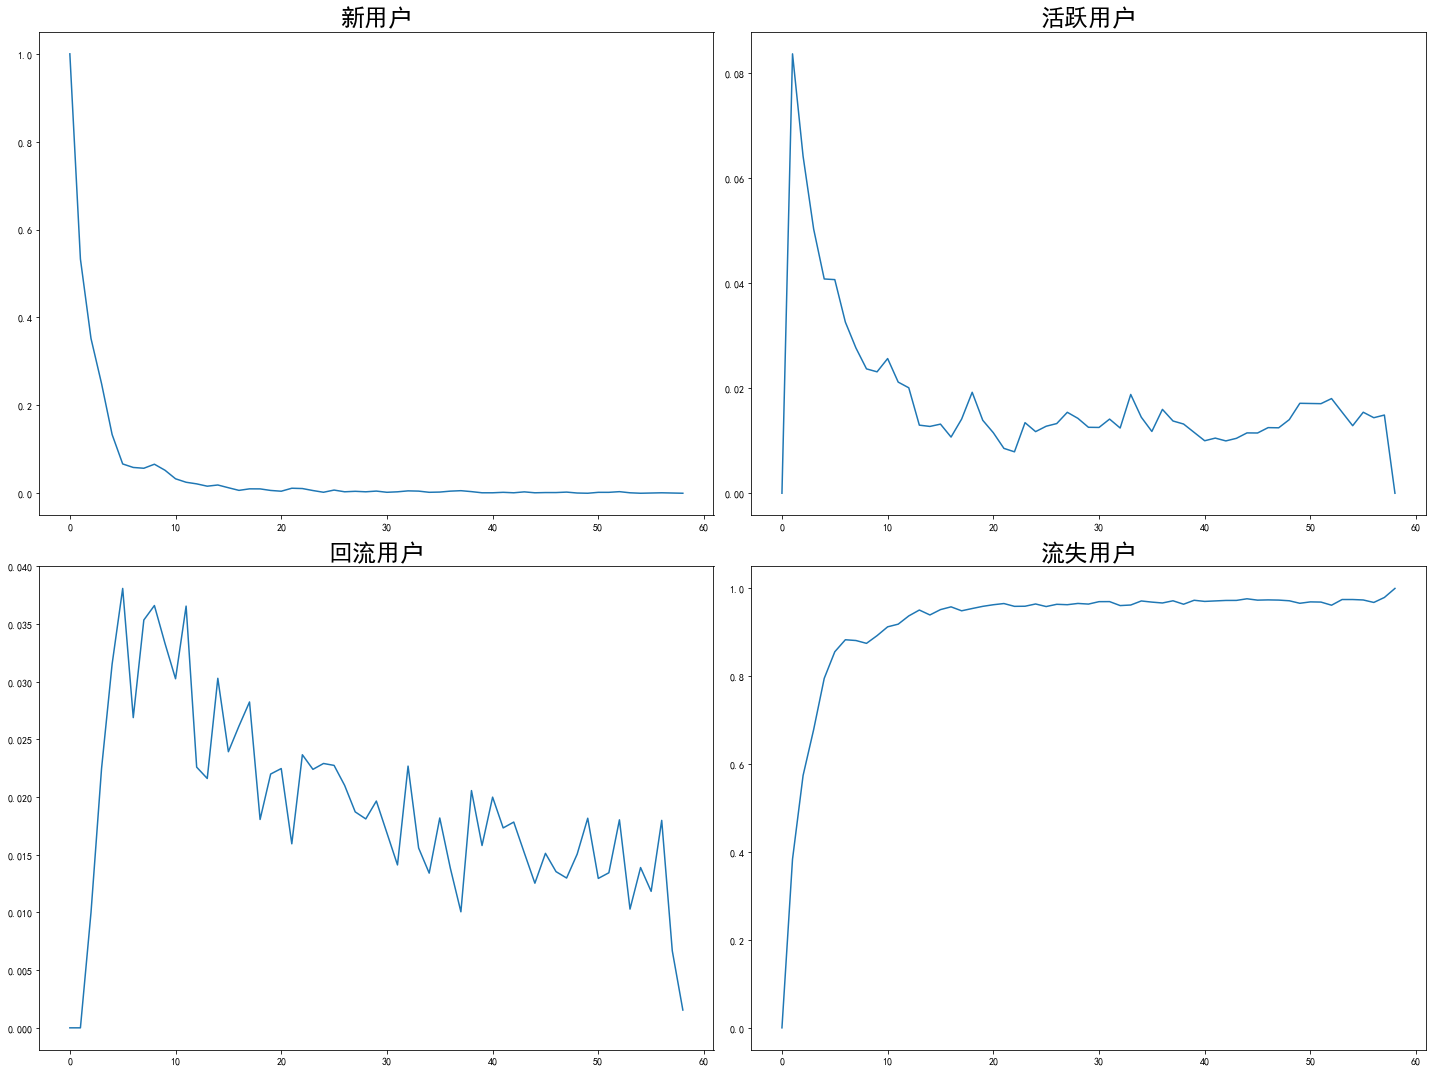

In [173]:

plt.figure(figsize=(20,15))

# 新
plt.subplot(221)
y1=df5['1']
x1=range(len(y1))
plt.plot(x1,y1)
plt.title('新用户',fontsize=24) 
 
# 活跃
plt.subplot(222)
y2=df5['2']
x2=range(len(y2))
plt.plot(x2,y2)
plt.title('活跃用户',fontsize=24) 

#回流
plt.subplot(223)
y3=df5['3']
x3=range(len(y3))
plt.plot(x3,y3)
plt.title('回流用户',fontsize=24)

#流失
plt.subplot(224)
y4=df5['4']
x4=range(len(y4))
plt.plot(x4,y4)
plt.title('流失用户',fontsize=24)
plt.tight_layout() # 设置子图的间距
plt.show()

In [128]:
# （new=新、active=活跃、return=回流、unactive=流失,unreg=未注册）
# 由上表可知，每天的用户消费状态变化：

# - 新客用户：仅在前10天，后续再无新增客户。

# - 活跃用户：在到顶峰后，比例持续下降，到第20天开始持续波动。

# - 回流用户：比例也持续下降。

# - 不活跃用户：比例从第12天左右持续到达顶峰，流失较大。

In [129]:
#我们的服务器周期短，如果是长期的话，可以在中途做出预测，通过一个服务器的数据，去调整其他服务器的数据

In [130]:
# 用户质量分析

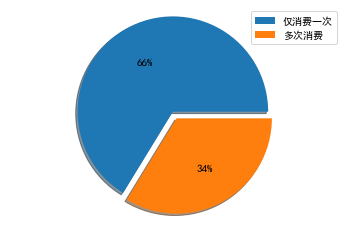

In [131]:
# 多少用户仅消费了一次(一天内消费多次记作一次)
a = df.groupby('player_id')['wash_date'].agg(['min','max']).reset_index()
new_old = (a['min']==a['max']).value_counts().values

plt.pie(x = new_old,
       autopct='%1.f%%',
       shadow=True,
       explode=[0.08,0],
       textprops={'fontsize':11})
plt.axis('equal')
plt.legend(['仅消费一次','多次消费'])

In [132]:
#有超过一半的用户仅消费一次，这也说明了运营不好，留存效果不好。

In [133]:
# 回购率
# 回购率：是某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。比如，我1天消费用户1000，他们中有300个2天依然消费，回购率是30%。

In [135]:
# 每个用户在每天中的订单数
#每个用户在每天的订单数
pivoted_df=df.pivot_table(index='player_id',columns='day',values='wash_date',#pivot_table透视表
                       aggfunc='count').fillna(0)
#某些用户在某天没有消费过，用nan表示，这里用0填充
pivoted_df.head()

day,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,...,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04
player_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
#转换：消费2次以上记为1，消费1次记为0，消费0次记为NAN  
#applymap针对dataframe所有数据
pivoted_df_transf=pivoted_df.applymap(lambda x: 1 if x>1 else np.nan if x==0 else 0)
pivoted_df_transf.head()

day,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,...,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04
player_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '复购率的变化')

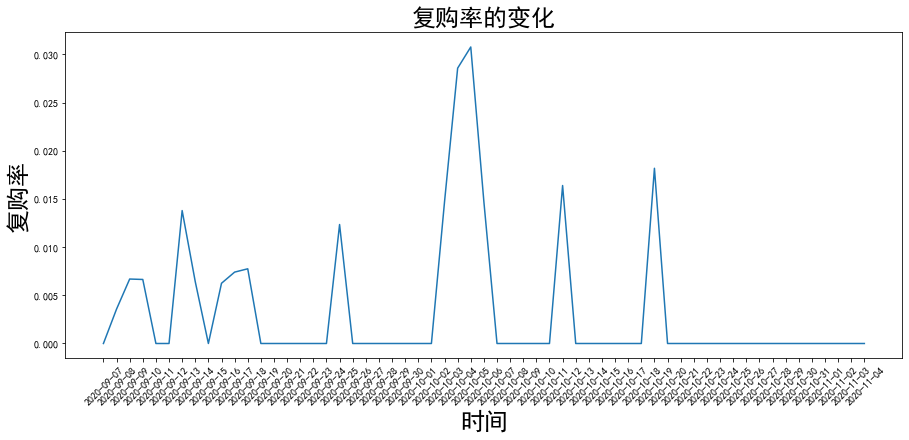

In [142]:
#count统计所有非空数据个数表示总消费用户数，sum计算非0数据的和表示消费两次以上的用户数
df_duplicate =pd.DataFrame(pivoted_df_transf.sum()/pivoted_df_transf.count()).reset_index()
df_duplicate.columns = ['Date', 'DuplicatedRate']
df_duplicate['Date'] = df_duplicate.Date.astype(str)

plt.figure(figsize = (15,6))
plt.xticks(rotation = 45)
plt.plot(df_duplicate.Date, df_duplicate.DuplicatedRate)
plt.xlabel('时间', fontsize=24)
plt.ylabel('复购率',fontsize=24)
# plt.ylim(0,1)
plt.title('复购率的变化',fontsize=24)

In [ ]:
# 可以看出复购率并不高，如1天新客们的复购率只有6%左右。而在后期，这时的用户都是大浪淘沙剩下的老客，复购率达到3%左右。单看新客和老客，复购率有三倍左右的差距。

In [ ]:
# 回购率
# 回购率：是某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。比如，我1天消费用户1000，他们中有300个2天依然消费，回购率是30%

In [143]:
#每个用户每个天平均消费金额
pivoted_money=df.pivot_table(index='player_id',columns='day',values='fee',
                             aggfunc='mean').fillna(0)

columns_day=df['day'].sort_values().astype('str').unique()
pivoted_money.columns=columns_day
pivoted_money.head()

,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,...,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04
player_id,,,,,,,,,,,,,,,,,,,,,
0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
#将有消费的记为1，没有消费的记为0
pivoted_purchase=pivoted_money.applymap(lambda x:1 if x>0 else 0)
pivoted_purchase.head()

,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,...,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04
player_id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
#如果本天进行消费，下天也进行消费，则记为1；如果下天没有消费，
# 则记为0，若本天没有记为消费，则记为nan
def purchase_return(data):
    status=[]
    for i in range(58):#循环17个天
        if data[i]==1:#若本天消费
            if data[i+1]==1:#下个天也消费
                status.append(1)#就记为1
            if data[i+1]==0:#下个天不消费，就记为0
                status.append(0)
        else:
            status.append(np.nan)
    status.append(np.nan)
    return pd.Series(status, index=columns_day)

pivoted_purchase_return=pivoted_purchase.apply(purchase_return,axis=1)#axis=1表示计算方向在行的方向上，左右运算
pivoted_purchase_return.head()

,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,...,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04
player_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


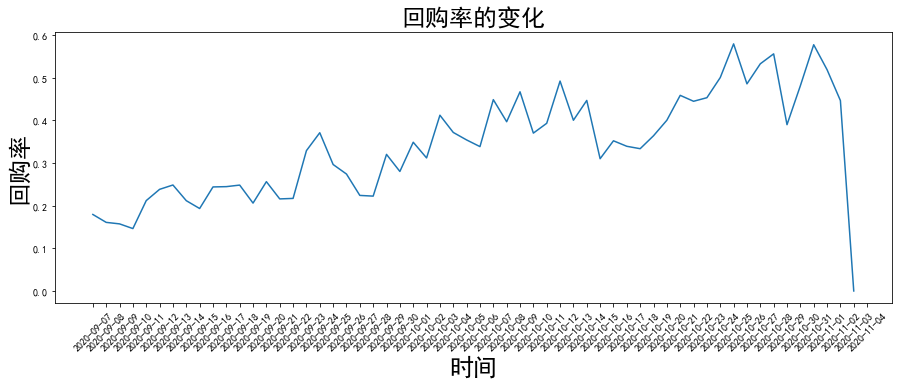

In [149]:
df_purchase = (pivoted_purchase_return.sum() / pivoted_purchase_return.count()).reset_index()
df_purchase.columns = ['Date', 'PurchaseRate']
df_purchase['Date'] = df_purchase.Date.astype(str)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 45)
plt.plot(df_purchase.Date, df_purchase.PurchaseRate)
plt.xlabel('时间', fontsize=24)
plt.ylabel('回购率', fontsize=24)
plt.title('回购率的变化', fontsize=24);

In [ ]:
# 可以看出，在初期用户的回购率并不高，1天的回购率只有20%左右
# 从每天有回购消费的用户数数据可以看出，回购用户数整体上升趋势。
# 9/26 日和 10/13 日有2个下降点
# 对回购率的分析，再次说明了对于新用户，在其第一次消费后的三个天内是一段重要的时期，需要营销策略积极引导其再次消费及持续消费。
# 另外，对于有持续消费的老客，也要适时推出反馈老客户的优惠活动，以加强老客的忠诚度。

In [152]:
# 分析留存率(3,6,9,12,15,18天为周期)
# 留存率：它指用户在第一次消费后，有多少比率进行第二次消费。

# 消费日期 - 第一次消费日期 = 第二次消费与第一次消费的时间间隔 ，再将天数转化为数值

# 分析留存率
# 新建一个对象，并增加用户第一次消费时间的列，merge将两个dataframe合并
data_t=df[['player_id','wash_date','count','fee']]
user_purchase_retention=pd.merge(left=data_t,
                                 right=orderdt_min.reset_index(),
                                 how='inner',
                                 on='player_id',
                                 suffixes=('','_min'))

In [154]:
# 增加一列，表示订单日期与用户首次消费日期间的间隔时间

#每一次消费时间与第一次消费时间间隔
user_purchase_retention['order_date_diff']=user_purchase_retention['wash_date']-user_purchase_retention['wash_date_min']
#将timedelta转换为数值型
user_purchase_retention['date_diff']=user_purchase_retention.order_date_diff.apply(
    lambda x:x/np.timedelta64(1,'D'))

In [160]:
# 将时间差值分桶处理：

# 分成0～3天内，3～7天内，7～15天……代表用户当前消费时间距第一次消费属于哪个时间段

#将时间间隔分桶（0-3）（3-7）等
bin=[0,3,6,9,12,15,18,21,24,27,30]
user_purchase_retention['date_diff_bin']=pd.cut(user_purchase_retention.date_diff,
                                                bins=bin)
user_purchase_retention.head(10)

,player_id,wash_date,count,fee,wash_date_min,order_date_diff,date_diff,date_diff_bin
0,0,2020-09-07,1,99,2020-09-07,0 days,0.0,NaN
1,1,2020-09-07,1,99,2020-09-07,0 days,0.0,NaN
2,2,2020-09-07,1,99,2020-09-07,0 days,0.0,NaN
3,3,2020-09-07,1,99,2020-09-07,0 days,0.0,NaN
4,4,2020-09-07,1,99,2020-09-07,0 days,0.0,NaN
5,5,2020-09-19,1,99,2020-09-19,0 days,0.0,NaN
6,5,2020-10-02,1,499,2020-09-19,13 days,13.0,"(12.0, 15.0]"
7,5,2020-10-28,1,499,2020-09-19,39 days,39.0,NaN
8,6,2020-09-07,2,99,2020-09-07,0 days,0.0,NaN
9,6,2020-09-08,1,99,2020-09-07,1 days,1.0,"(0.0, 3.0]"


In [161]:
# 这里date_diff=0并没有被划分入0～3天，因为计算的是留存率，如果用户仅消费了一次，留存率应该是0。另外，如果用户第一天内消费了多次，但是往后没有消费，也算作留存率0。

# pivot_table数据透视，Pandas函数pivot_table会默认删除含有空值的行，用dropna=False保持NaN的值。

#用户第一次消费之后，后续各时间段的消费总额
pivoted_retention=user_purchase_retention.pivot_table(index='player_id',
                                                      columns='date_diff_bin',
                                                      values='fee',
                                                      aggfunc=sum,
                                                      dropna=False)

In [162]:
# 获得的结果是用户在第一次消费之后，在后续各时间段内的消费总额：

pivoted_retention.mean()#各时间段的平均消费额

date_diff_bin
(0, 3]      519.415730
(3, 6]      768.595652
(6, 9]      625.796380
(9, 12]     746.017341
(12, 15]    720.311594
(15, 18]    797.067164
(18, 21]    584.248000
(21, 24]    683.631579
(24, 27]    621.304762
(27, 30]    453.009091
dtype: float64

In [163]:
# 虽然后面时间段的金额高，但是它的时间范围也宽广。从平均效果看，用户第一次消费后的0～3天内，更可能消费更多。

# 依旧将数据转换成是否，1代表在该时间段内有后续消费，0代表没有：

#1代表有消费，0代表没有
pivoted_retention_trans=pivoted_retention.applymap(lambda x:1 if x>0 else 0)
pivoted_retention_trans

date_diff_bin,"(0, 3]","(3, 6]","(6, 9]","(9, 12]","(12, 15]","(15, 18]","(18, 21]","(21, 24]","(24, 27]","(27, 30]"
player_id,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1942,0,0,0,0,0,0,0,0,0,0
1943,0,0,0,0,0,0,0,0,0,0
1944,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, '留存率')

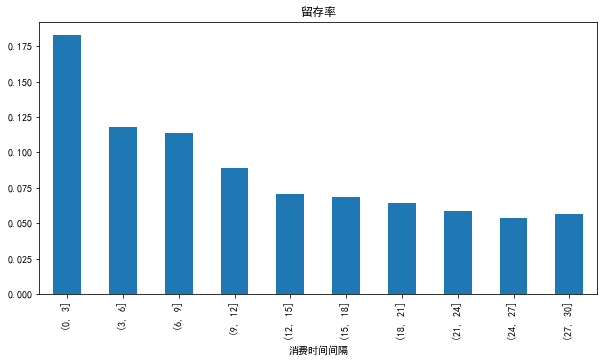

In [164]:
#每笔订单离第一笔订单的时间间隔
(pivoted_retention_trans.sum()/pivoted_retention_trans.count()).plot.bar(figsize=(10,5))
plt.xlabel('消费时间间隔')
plt.title('留存率')

In [ ]:
# 只有1.75%的用户在第一次消费的次日至3天内有过消费，3%的用户在3～7天内有过消费。数字并不好看，CD购买确实不是高频消费行为。有20%的用户在第一次消费后的三个天到半年之间有过购买，27%的用户在半年后至1年内有过购买。

# 从运营角度看，CD机营销在服务新用户的同时，应该注重用户忠诚度的培养，放长线掉大鱼，在一定时间内召回用户购买。

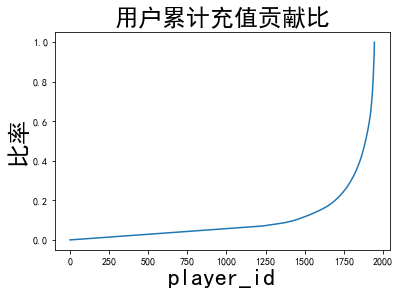

In [174]:
# 大客户的贡献率
# 因为消费行为有明显的二八倾向，想知道高质量用户为消费贡献了多少份额？

# 用户销售额贡献情况：

# 按照用户id分组，对用户的消费金额进行累计求和 ，然后与总销售额比，得到比率，横坐标是用户的id。

#先将用户消费金额按升序排列，逐行计算用户累计金额，最后一行是总消费金额
user_money=df.groupby('player_id')['fee'].sum().sort_values().reset_index()
user_money['money_cumsum']=user_money['fee'].cumsum()
money_total=user_money.money_cumsum.max()
#转行成百分比
user_money['prop']=user_money.apply(lambda x:x.money_cumsum/money_total,axis=1)#apply用在每个行上
user_money.tail()
user_money.prop.plot()
plt.xlabel('player_id', fontsize=24)
plt.ylabel('比率', fontsize=24)
plt.title('用户累计充值贡献比', fontsize=24);

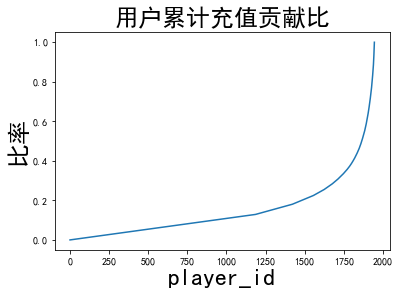

In [176]:
# 说明：前1750个用户，大约80%的用户贡献了40%的销售额，20%的用户贡献了60%的销售额

# 用户销量贡献情况

#先将用户销量按升序排列，逐行计算用户累计销量，最后一行是总销量
user_productsSum=df.groupby('player_id')['count'].sum().sort_values().reset_index()
user_productsSum['products_cumsum']=user_productsSum['count'].cumsum()
productsSum_total=user_productsSum.products_cumsum.max()
#转行成百分比
user_productsSum['prop']=user_productsSum.apply(lambda x:x.products_cumsum/productsSum_total,axis=1)#apply用在每个行上
user_productsSum.tail()
user_productsSum.prop.plot()
plt.xlabel('player_id', fontsize=24)
plt.ylabel('比率', fontsize=24)
plt.title('用户累计充值贡献比', fontsize=24);

In [ ]:
# 前20000名用户贡献了40%的消费，而后3500名用户贡献了60%的消费。符合二八趋势。也就是说我们只要维护了这3500个用户就可以把业绩KPI完成60%，如果能把3500个用户运营的更好就可以占比70%—80%之间。

In [ ]:
####################################################################################

In [181]:
import datetime,time

In [190]:
#dead_time = datetime.datetime.strptime(str('2020-10-14'), '%Y-%m-%d')
#interval_time = datetime.timedelta(days=7)
serverid = 'glb00008'
startdate='2020-10-03 00:00:00'
enddate = '2020-11-04 00:00:00'
enddate_1 = datetime.datetime.strftime((datetime.datetime.strptime(startdate,'%Y-%m-%d %H:%M:%S')+datetime.timedelta(days=1)),'%Y-%m-%d %H:%M:%S')
#forthdate = datetime.datetime.strftime((datetime.datetime.strptime(startdate,'%Y-%m-%d')+datetime.timedelta(days=3)),'%Y-%m-%d')
#fifthdate = datetime.datetime.strftime((datetime.datetime.strptime(startdate,'%Y-%m-%d')+datetime.timedelta(days=4)),'%Y-%m-%d')
PG_HOST = XXXXX
PG_PORT =XXXXX
PG_USER = XXXXX
PG_PASSWORD = XXXXX
PG_DATABASE = XXXXX



In [191]:
enddate_1 

'2020-10-04 00:00:00'

In [193]:
n = 1
count = []
for n in range(30):
    enddate_1 = datetime.datetime.strftime((datetime.datetime.strptime(startdate,'%Y-%m-%d %H:%M:%S')+datetime.timedelta(days=1*n)),'%Y-%m-%d %H:%M:%S')

    ##角色等级<= 50
    sql_t1 = f"select count(distinct player_id ) from player_last_info where acct in (select distinct customer_user_id  from acct.af_log al where event_name ='af_achieve_joingang'  and event_time between '{startdate}' and '{enddate_1}') and server = '{serverid}' "
    pg_host = PG_HOST
    pg_port = PG_PORT
    pg_user = PG_USER
    pg_password = PG_PASSWORD
    pg_database = PG_DATABASE
    pg_table = ""

    conn_string = "host=" + pg_host + " port=" + pg_port + " dbname=" + pg_database + " user=" + pg_user + " password=" + pg_password
    conn = psycopg2.connect(conn_string)

    curs = conn.cursor()
    curs.execute(sql_t1 )

    data_BH  = curs.fetchall()
    columns_ = ['count']
    print(data_BH)
    count.append(data_BH)
    #data_BH  = pd.DataFrame(data_BH  ,columns=columns_ )

    conn.commit()
    curs.close()
    conn.close()

[(0,)]
[(60,)]
[(93,)]
[(117,)]
[(138,)]
[(192,)]
[(212,)]
[(235,)]
[(277,)]
[(309,)]
[(347,)]
[(365,)]
[(381,)]
[(400,)]
[(417,)]
[(424,)]
[(434,)]
[(450,)]
[(455,)]
[(471,)]
[(487,)]
[(502,)]
[(516,)]
[(540,)]
[(554,)]
[(569,)]
[(580,)]
[(584,)]
[(593,)]
[(602,)]


In [206]:
count

[[(0,)],
 [(60,)],
 [(93,)],
 [(117,)],
 [(138,)],
 [(192,)],
 [(212,)],
 [(235,)],
 [(277,)],
 [(309,)],
 [(347,)],
 [(365,)],
 [(381,)],
 [(400,)],
 [(417,)],
 [(424,)],
 [(434,)],
 [(450,)],
 [(455,)],
 [(471,)],
 [(487,)],
 [(502,)],
 [(516,)],
 [(540,)],
 [(554,)],
 [(569,)],
 [(580,)],
 [(584,)],
 [(593,)],
 [(602,)]]

In [205]:
type(count)

list

In [207]:
count[2][0][0]
count1= []
for n in range(len(count)):
    count1.append(count[n][0][0])

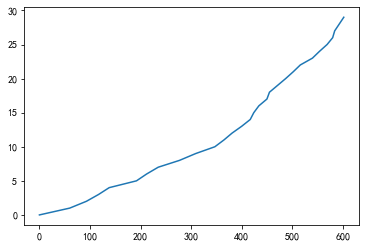

In [209]:
import matplotlib.pyplot as plt
x = count1
y =range(len(x))
plt.plot(x,y)

In [ ]:
n = 1
count = []
for n in range(30):
    enddate_1 = datetime.datetime.strftime((datetime.datetime.strptime(startdate,'%Y-%m-%d %H:%M:%S')+datetime.timedelta(days=1*n)),'%Y-%m-%d %H:%M:%S')

    ##角色等级<= 50
    sql_t1 = f"select count(distinct player_id ) from player_last_info where acct in (select distinct customer_user_id  from acct.af_log al where event_name ='af_achieve_joingang'  and event_time between '{startdate}' and '{enddate_1}') and server = '{serverid}' "
    pg_host = PG_HOST
    pg_port = PG_PORT
    pg_user = PG_USER
    pg_password = PG_PASSWORD
    pg_database = PG_DATABASE
    pg_table = ""

    conn_string = "host=" + pg_host + " port=" + pg_port + " dbname=" + pg_database + " user=" + pg_user + " password=" + pg_password
    conn = psycopg2.connect(conn_string)

    curs = conn.cursor()
    curs.execute(sql_t1 )

    data_BH  = curs.fetchall()
    columns_ = ['count']
    print(data_BH)
    count.append(data_BH)
    #data_BH  = pd.DataFrame(data_BH  ,columns=columns_ )

    conn.commit()
    curs.close()
    conn.close()

In [ ]:
serverid = 'glb00008'
startdate='2020-10-03 00:00:00'
enddate = '2020-10-10 00:00:00'

#enddate_1 = datetime.datetime.strftime((datetime.datetime.strptime(startdate,'%Y-%m-%d %H:%M:%S')+datetime.timedelta(days=1*n)),'%Y-%m-%d %H:%M:%S')

##角色等级<= 50
sql_t1 = f"select count(distinct player_id ) from player_last_info where acct in (select distinct customer_user_id  from acct.af_log al where event_name ='af_achieve_joingang'  and event_time between '{startdate}' and '{enddate}') and server = '{serverid}' "
pg_host = PG_HOST
pg_port = PG_PORT
pg_user = PG_USER
pg_password = PG_PASSWORD
pg_database = PG_DATABASE
pg_table = ""

conn_string = "host=" + pg_host + " port=" + pg_port + " dbname=" + pg_database + " user=" + pg_user + " password=" + pg_password
conn = psycopg2.connect(conn_string)

curs = conn.cursor()
curs.execute(sql_t1 )

data_BH  = curs.fetchall()
columns_ = ['count']
print(data_BH)
count.append(data_BH)
#data_BH  = pd.DataFrame(data_BH  ,columns=columns_ )

conn.commit()
curs.close()
conn.close()

In [ ]:
###############################################################

In [263]:
x =list(set(df['fee'].tolist()))

In [265]:
x.sort()

In [264]:
df

,fee,player_id,wash_date,ch,count,day
0,99,0,2020-09-07,agl,1,2020-09-07
1,99,1,2020-09-07,agl,1,2020-09-07
2,99,2,2020-09-07,agl,1,2020-09-07
3,99,3,2020-09-07,agl,1,2020-09-07
4,99,4,2020-09-07,agl,1,2020-09-07
...,...,...,...,...,...,...
5435,99,1942,2020-10-27,agl,2,2020-10-27
5436,99,1943,2020-10-29,agl,1,2020-10-29
5437,499,1944,2020-11-02,agl,1,2020-11-02
5438,99,1945,2020-11-03,agl,1,2020-11-03


In [267]:
x

[99, 199, 299, 499, 999, 1499, 2999, 4999, 9999]

In [268]:
price=[]
for n in x:
    print(len(df[df['fee']==n]))
    price.append(len(df[df['fee']==n]))

3223
394
688
757
95
207
38
27
11


In [269]:
price

[3223, 394, 688, 757, 95, 207, 38, 27, 11]

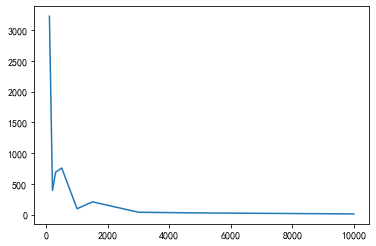

In [270]:
plt.plot(x,price)

In [271]:
price_df = pd.DataFrame(list(zip(x,price)))

In [272]:
price_df

,0,1
0,99,3223
1,199,394
2,299,688
3,499,757
4,999,95
5,1499,207
6,2999,38
7,4999,27
8,9999,11
